In [1]:
# Importing libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
AQI_df= pd.read_csv('Datasets/AQI Dataset.csv')
AQI_df.sample(10)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
733699,Shillong,2019-12-07,2.69,4.74,0.54,1.67,0.71,1.73,0.13,3.92,23.42,0.19,0.14,NaN,NaN,NaN
73903,Amritsar,2017-03-09 19:00:00,35.49,39.71,10.23,15.54,NaN,2.38,0.47,1.80,13.14,NaN,NaN,NaN,54.0,Satisfactory
635890,Talcher,2019-04-29 16:00:00,53.69,239.41,NaN,21.00,14.45,5.61,1.33,22.93,23.71,0.00,NaN,NaN,NaN,NaN
92146,Amritsar,2019-04-08 22:00:00,67.64,134.82,13.99,25.00,38.99,12.00,1.52,NaN,NaN,7.37,2.37,7.67,94.0,Satisfactory
70864,Amaravati,2020-03-06 17:00:00,20.50,34.50,2.45,5.00,4.60,9.10,0.51,15.45,38.40,0.10,0.15,NaN,41.0,Good
668744,Thiruvananthapuram,2020-01-13 03:00:00,63.25,78.75,1.82,12.75,8.25,15.55,0.83,9.98,65.35,NaN,NaN,NaN,92.0,Satisfactory
380945,Hyderabad,2018-08-07 19:00:00,20.55,74.25,3.52,28.50,17.87,23.62,0.32,9.01,17.18,0.67,8.15,1.46,49.0,Good
291940,Delhi,2020-05-02 17:00:00,36.40,129.92,21.01,13.91,10.32,31.41,0.81,11.41,88.15,0.96,4.97,0.01,127.0,Moderate
398474,Jaipur,2017-07-21 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700979,Visakhapatnam,2019-09-17 17:00:00,28.00,51.00,3.80,9.40,8.05,4.30,0.15,NaN,38.55,0.95,3.15,0.65,90.0,Satisfactory


In [2]:
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737406 entries, 0 to 737405
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        737406 non-null  object 
 1   Datetime    737406 non-null  object 
 2   PM2.5       587720 non-null  float64
 3   PM10        429529 non-null  float64
 4   NO          617192 non-null  float64
 5   NO2         616699 non-null  float64
 6   NOx         609997 non-null  float64
 7   NH3         454536 non-null  float64
 8   CO          648830 non-null  float64
 9   SO2         603179 non-null  float64
 10  O3          604176 non-null  float64
 11  Benzene     568137 non-null  float64
 12  Toluene     508758 non-null  float64
 13  Xylene      263468 non-null  float64
 14  AQI         603645 non-null  float64
 15  AQI_Bucket  603645 non-null  object 
dtypes: float64(13), object(3)
memory usage: 90.0+ MB


In [3]:
AQI_df.shape

(737406, 16)

In [4]:
#Checking null values
null_values=AQI_df.isnull().sum()
missing_percentage = (AQI_df.isnull().sum() / len(AQI_df)) * 100
print(null_values)
print(missing_percentage)

City               0
Datetime           0
PM2.5         149686
PM10          307877
NO            120214
NO2           120707
NOx           127409
NH3           282870
CO             88576
SO2           134227
O3            133230
Benzene       169269
Toluene       228648
Xylene        473938
AQI           133761
AQI_Bucket    133761
dtype: int64
City           0.000000
Datetime       0.000000
PM2.5         20.298994
PM10          41.751355
NO            16.302281
NO2           16.369137
NOx           17.277999
NH3           38.360144
CO            12.011836
SO2           18.202591
O3            18.067388
Benzene       22.954655
Toluene       31.007071
Xylene        64.270971
AQI           18.139397
AQI_Bucket    18.139397
dtype: float64


In [5]:
# Since Xylene column has almost 64% null values therefore we remove it from our dataset
AQI_df.drop(['Xylene'], axis=1, inplace=True)

In [6]:
AQI_df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,NaN,NaN


In [7]:
AQI_df.isnull().sum()

City               0
Datetime           0
PM2.5         149686
PM10          307877
NO            120214
NO2           120707
NOx           127409
NH3           282870
CO             88576
SO2           134227
O3            133230
Benzene       169269
Toluene       228648
AQI           133761
AQI_Bucket    133761
dtype: int64

In [8]:
AQI_df.dropna(inplace=True)

In [9]:
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239322 entries, 48220 to 737404
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        239322 non-null  object 
 1   Datetime    239322 non-null  object 
 2   PM2.5       239322 non-null  float64
 3   PM10        239322 non-null  float64
 4   NO          239322 non-null  float64
 5   NO2         239322 non-null  float64
 6   NOx         239322 non-null  float64
 7   NH3         239322 non-null  float64
 8   CO          239322 non-null  float64
 9   SO2         239322 non-null  float64
 10  O3          239322 non-null  float64
 11  Benzene     239322 non-null  float64
 12  Toluene     239322 non-null  float64
 13  AQI         239322 non-null  float64
 14  AQI_Bucket  239322 non-null  object 
dtypes: float64(12), object(3)
memory usage: 29.2+ MB


In [10]:
# Detecting numerical and categorical columns 
numerical_cols = AQI_df.select_dtypes(include=['number']).columns
categorical_cols = AQI_df.select_dtypes(include=['object']).columns
print(numerical_cols)
print(categorical_cols)

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI'],
      dtype='object')
Index(['City', 'Datetime', 'AQI_Bucket'], dtype='object')


In [11]:
AQI_df.shape

(239322, 15)

In [12]:
AQI_df.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

In [13]:
AQI_df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
48220,Aizawl,2020-03-12 13:00:00,25.0,31.11,7.14,1.86,11.28,24.00,0.42,4.31,0.76,0.0,0.0,51.0,Satisfactory
48221,Aizawl,2020-03-12 14:00:00,19.0,29.17,7.32,1.15,10.85,27.59,0.44,4.65,0.07,0.0,0.0,52.0,Satisfactory
48222,Aizawl,2020-03-12 15:00:00,24.0,30.00,7.14,1.04,10.51,31.13,0.43,4.83,0.67,0.0,0.0,52.0,Satisfactory
48223,Aizawl,2020-03-12 16:00:00,25.0,32.08,7.20,1.19,10.74,33.31,0.46,5.26,0.05,0.0,0.0,53.0,Satisfactory
48224,Aizawl,2020-03-12 17:00:00,33.0,41.00,7.22,1.37,10.93,30.05,0.50,5.39,0.02,0.0,0.0,54.0,Satisfactory


In [14]:
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239322 entries, 48220 to 737404
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        239322 non-null  object 
 1   Datetime    239322 non-null  object 
 2   PM2.5       239322 non-null  float64
 3   PM10        239322 non-null  float64
 4   NO          239322 non-null  float64
 5   NO2         239322 non-null  float64
 6   NOx         239322 non-null  float64
 7   NH3         239322 non-null  float64
 8   CO          239322 non-null  float64
 9   SO2         239322 non-null  float64
 10  O3          239322 non-null  float64
 11  Benzene     239322 non-null  float64
 12  Toluene     239322 non-null  float64
 13  AQI         239322 non-null  float64
 14  AQI_Bucket  239322 non-null  object 
dtypes: float64(12), object(3)
memory usage: 29.2+ MB


In [15]:
# Printing the mean and median values of all the numerical columns
mean_values=AQI_df[numerical_cols].mean()
median_values=AQI_df[numerical_cols].median()
print(mean_values)
print(median_values)

PM2.5       61.813510
PM10       125.092535
NO          18.531356
NO2         33.339782
NOx         36.262404
NH3         23.418141
CO           1.027775
SO2         11.270571
O3          38.721834
Benzene      4.055001
Toluene      9.854879
AQI        143.422594
dtype: float64
PM2.5       44.12
PM10        95.80
NO           7.98
NO2         26.88
NOx         24.49
NH3         18.05
CO           0.74
SO2          8.64
O3          31.05
Benzene      1.50
Toluene      4.33
AQI        110.00
dtype: float64


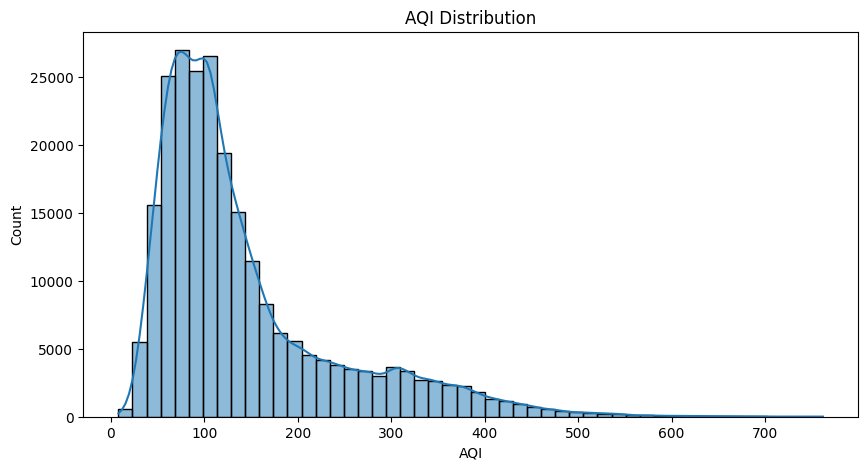

In [16]:
# Plot for frequency of AQI 
plt.figure(figsize=(10, 5))
sns.histplot(AQI_df['AQI'], bins=50, kde=True)
plt.title("AQI Distribution")
plt.show()


The above graph shows that:-
1. The highest frequency is for AQI values between 0 and 100, suggesting that most recorded air quality falls within Good to Satisfactory levels
2. The frequency sharply declines as AQI increases beyond 400, meaning that severe pollution events are rare but present
3. A few data points exceed 550+ AQI, which are extreme pollution levels (possibly due to industrial areas, wildfires, duststorms, etc.)

In [17]:
AQI_df.shape

(239322, 15)

In [18]:
# Check for any null values remaining
(AQI_df[numerical_cols]==0.0).sum()

PM2.5          0
PM10           0
NO             0
NO2            0
NOx         4365
NH3            0
CO          3900
SO2            0
O3             0
Benzene    13790
Toluene    11598
AQI            0
dtype: int64

In [19]:
#Since the distribution is skewed we will use median to replace the 0.0 values of the dataset
AQI_df[numerical_cols] = AQI_df[numerical_cols].replace(0.0, AQI_df[numerical_cols].median())

In [20]:
(AQI_df[numerical_cols]==0.0).sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64

In [21]:
AQI_df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
48220,Aizawl,2020-03-12 13:00:00,25.0,31.11,7.14,1.86,11.28,24.00,0.42,4.31,0.76,1.5,4.33,51.0,Satisfactory
48221,Aizawl,2020-03-12 14:00:00,19.0,29.17,7.32,1.15,10.85,27.59,0.44,4.65,0.07,1.5,4.33,52.0,Satisfactory
48222,Aizawl,2020-03-12 15:00:00,24.0,30.00,7.14,1.04,10.51,31.13,0.43,4.83,0.67,1.5,4.33,52.0,Satisfactory
48223,Aizawl,2020-03-12 16:00:00,25.0,32.08,7.20,1.19,10.74,33.31,0.46,5.26,0.05,1.5,4.33,53.0,Satisfactory
48224,Aizawl,2020-03-12 17:00:00,33.0,41.00,7.22,1.37,10.93,30.05,0.50,5.39,0.02,1.5,4.33,54.0,Satisfactory


In [22]:
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239322 entries, 48220 to 737404
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        239322 non-null  object 
 1   Datetime    239322 non-null  object 
 2   PM2.5       239322 non-null  float64
 3   PM10        239322 non-null  float64
 4   NO          239322 non-null  float64
 5   NO2         239322 non-null  float64
 6   NOx         239322 non-null  float64
 7   NH3         239322 non-null  float64
 8   CO          239322 non-null  float64
 9   SO2         239322 non-null  float64
 10  O3          239322 non-null  float64
 11  Benzene     239322 non-null  float64
 12  Toluene     239322 non-null  float64
 13  AQI         239322 non-null  float64
 14  AQI_Bucket  239322 non-null  object 
dtypes: float64(12), object(3)
memory usage: 29.2+ MB


In [23]:
#Identifying unique AQI categories
aqi_buckets = AQI_df['AQI_Bucket'].unique()
print("Unique AQI Categories:", aqi_buckets)

Unique AQI Categories: ['Satisfactory' 'Good' 'Moderate' 'Poor' 'Very Poor' 'Severe']


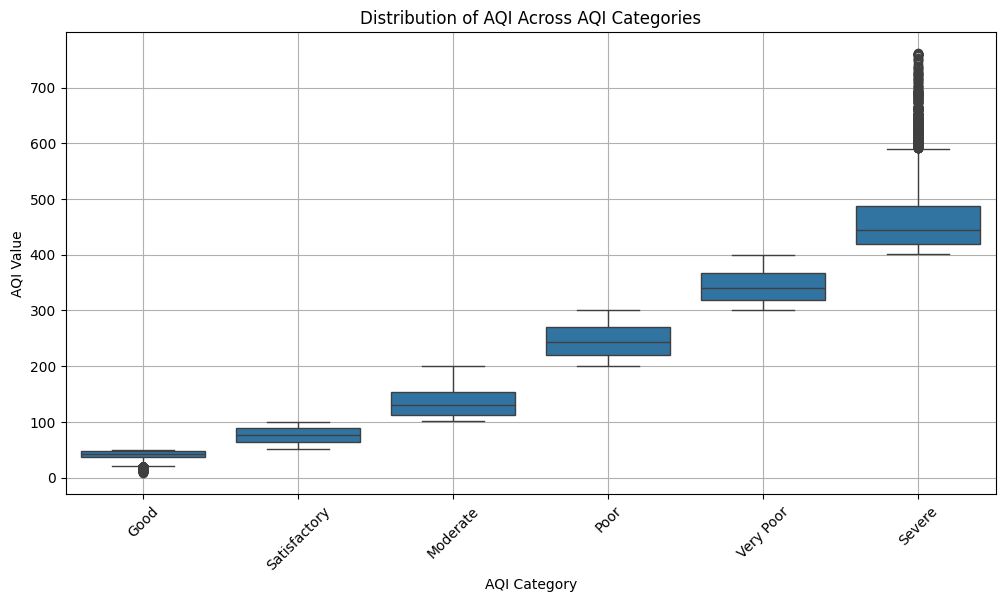

In [24]:
# Plot to show how AQI is distributed among diff AQI categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='AQI_Bucket', y='AQI', data=AQI_df, order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
plt.title("Distribution of AQI Across AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("AQI Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The above graph shows that:-
1. AQI lying in Severe pollution is highly variable (500<AQI<700+).
2. Box sizes increase with pollution severity, indicating higher variation in bad air quality.
3. Some unexpectedly high AQI values appear even in the Satisfactory and Moderate categories.

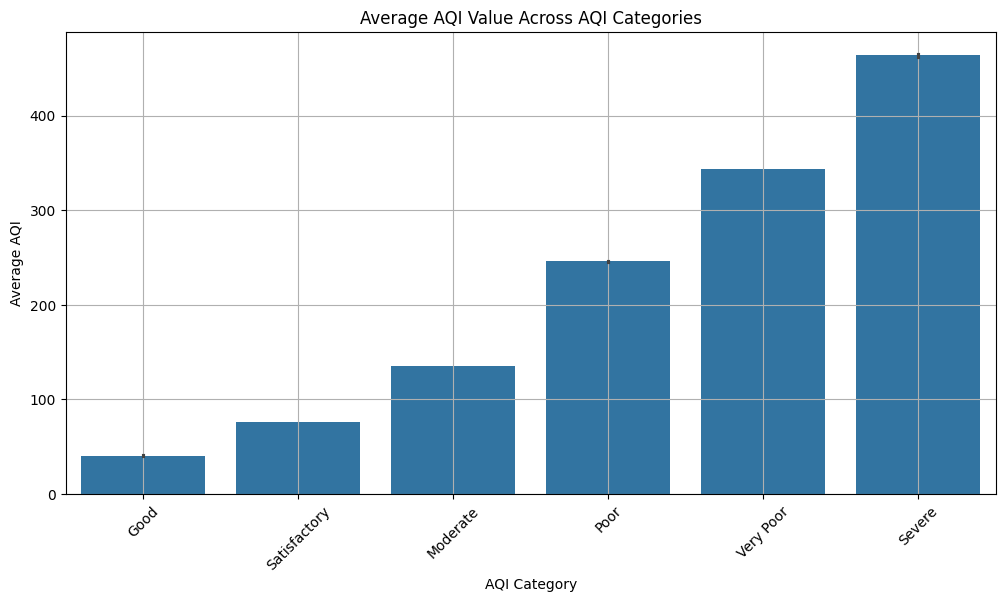

In [25]:
# Plot to show average AQI values in all the categories
plt.figure(figsize=(12, 6))
sns.barplot(x='AQI_Bucket', y='AQI', data=AQI_df, estimator=lambda x: x.mean(), order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
plt.title("Average AQI Value Across AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The above graph shows that:-
1. The transition from Good to Satisfactory to Moderate is more gradual.
2. The largest jumps occur in "Very Poor" and "Severe" categories.

In [26]:
# Finding the limits of AQI lying into AQI categories
aqi_limits = AQI_df.groupby('AQI_Bucket')['AQI'].agg(['min', 'max']).reset_index()
aqi_limits.columns = ['AQI_Bucket', 'Lower_Limit', 'Upper_Limit']
print(aqi_limits)

     AQI_Bucket  Lower_Limit  Upper_Limit
0          Good          8.0         50.0
1      Moderate        101.0        200.0
2          Poor        201.0        300.0
3  Satisfactory         51.0        100.0
4        Severe        401.0        762.0
5     Very Poor        301.0        400.0


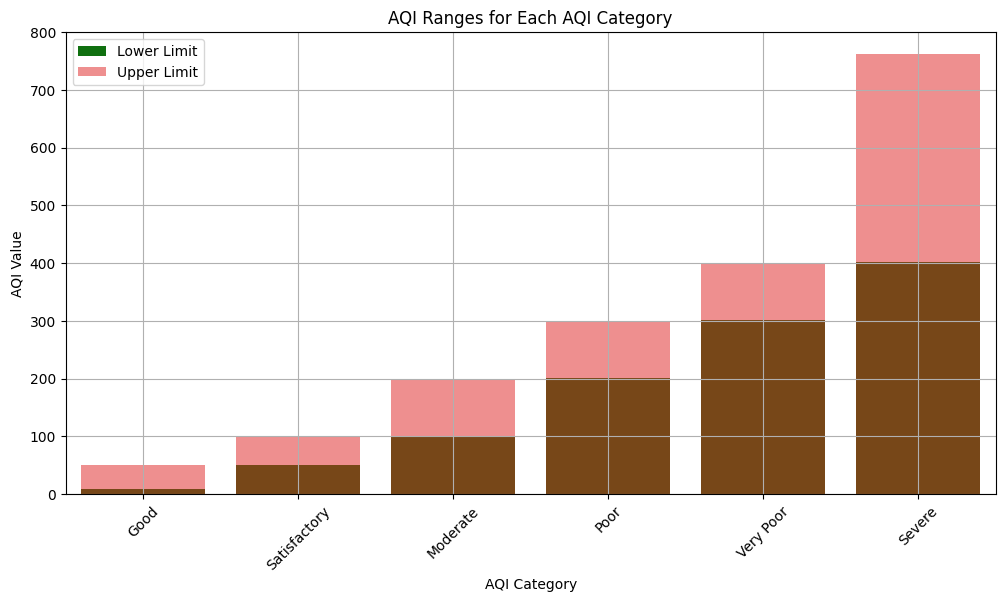

In [27]:
# Plot to show upper limit and lower limit for each AQI category
plt.figure(figsize=(12, 6))
sns.barplot(x='AQI_Bucket', y='Lower_Limit', data=aqi_limits, color='green', label="Lower Limit", order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
sns.barplot(x='AQI_Bucket', y='Upper_Limit', data=aqi_limits, color='red', alpha=0.5, label="Upper Limit", order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
plt.title("AQI Ranges for Each AQI Category")
plt.xlabel("AQI Category")
plt.ylabel("AQI Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

The above graph shows that:-
1. The Severe category has a massive spread, with AQI going far beyond 500. This suggests some extreme pollution events or highly polluted cities.
2. Lower & Upper Limits Vary for Each Category
3. Lower limits (brown) are consistent with AQI guidelines.
4. Upper limits (pink) are much higher in "Severe" due to outliers.
5. Most categories have stable AQI ranges, but the "Severe" category is highly volatile.

In [28]:
AQI_df['AQI_Bucket'].isnull().sum()

np.int64(0)

In [29]:
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239322 entries, 48220 to 737404
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        239322 non-null  object 
 1   Datetime    239322 non-null  object 
 2   PM2.5       239322 non-null  float64
 3   PM10        239322 non-null  float64
 4   NO          239322 non-null  float64
 5   NO2         239322 non-null  float64
 6   NOx         239322 non-null  float64
 7   NH3         239322 non-null  float64
 8   CO          239322 non-null  float64
 9   SO2         239322 non-null  float64
 10  O3          239322 non-null  float64
 11  Benzene     239322 non-null  float64
 12  Toluene     239322 non-null  float64
 13  AQI         239322 non-null  float64
 14  AQI_Bucket  239322 non-null  object 
dtypes: float64(12), object(3)
memory usage: 29.2+ MB


In [30]:
AQI_df.shape

(239322, 15)

In [31]:
AQI_df.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

In [32]:
AQI_df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
48220,Aizawl,2020-03-12 13:00:00,25.0,31.11,7.14,1.86,11.28,24.00,0.42,4.31,0.76,1.5,4.33,51.0,Satisfactory
48221,Aizawl,2020-03-12 14:00:00,19.0,29.17,7.32,1.15,10.85,27.59,0.44,4.65,0.07,1.5,4.33,52.0,Satisfactory
48222,Aizawl,2020-03-12 15:00:00,24.0,30.00,7.14,1.04,10.51,31.13,0.43,4.83,0.67,1.5,4.33,52.0,Satisfactory
48223,Aizawl,2020-03-12 16:00:00,25.0,32.08,7.20,1.19,10.74,33.31,0.46,5.26,0.05,1.5,4.33,53.0,Satisfactory
48224,Aizawl,2020-03-12 17:00:00,33.0,41.00,7.22,1.37,10.93,30.05,0.50,5.39,0.02,1.5,4.33,54.0,Satisfactory


In [33]:
AQI_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000
mean,61.813510,125.092535,18.531356,33.339782,36.709078,23.418141,1.039834,11.270571,38.721834,4.141433,10.064720,143.422594
std,62.803755,103.770181,33.829649,25.601033,40.002762,18.960396,1.464409,10.426656,29.183399,21.101855,23.906228,99.630428
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,8.000000
25%,25.550000,58.000000,3.800000,15.340000,14.780000,11.140000,0.500000,5.530000,17.810000,0.630000,1.820000,76.000000
50%,44.120000,95.800000,7.980000,26.880000,24.490000,18.050000,0.740000,8.640000,31.050000,1.500000,4.330000,110.000000
75%,72.980000,153.190000,16.770000,43.930000,41.900000,30.600000,1.090000,13.330000,52.430000,3.630000,10.910000,173.000000
max,999.990000,1000.000000,498.970000,380.020000,493.400000,485.820000,47.420000,199.930000,497.620000,498.070000,498.070000,762.000000


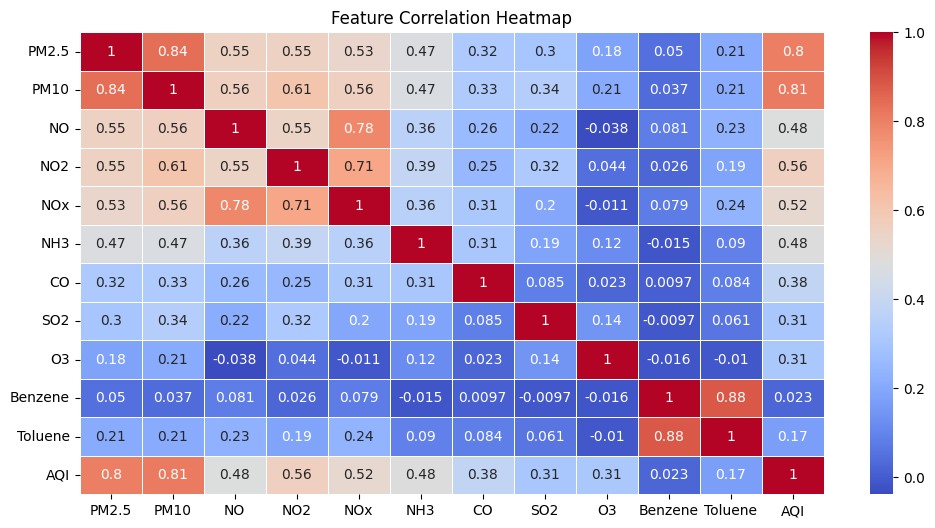

In [34]:
# Plot ot show the correlation between the pollutants and AQI 
plt.figure(figsize=(12, 6))
numerical_columns = AQI_df.select_dtypes(include=['number'])
correlation=numerical_columns.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

1. PM10 and PM2.5 Has the Highest Correlation with AQI (0.80). Indicates that PM10 and PM2.5 is a major contributor to AQI levels incerasing  pollution.
2. NO2 also Strongly Correlates with AQI (0.56).
3. NH3 and NOx Show Moderate Correlation with AQI (~0.48-0.52). NH3 (Ammonia) and NOx (Nitrogen Oxides) have a moderate impact on air quality.
4. Toluene and Benzene Are Highly Correlated (0.68) same for NOx and NO (0.78)
5. Other Pollutants Show Lower Correlation with AQI. Like toluene (0.17), SO₂ (0.31), and Benzene (0.023)

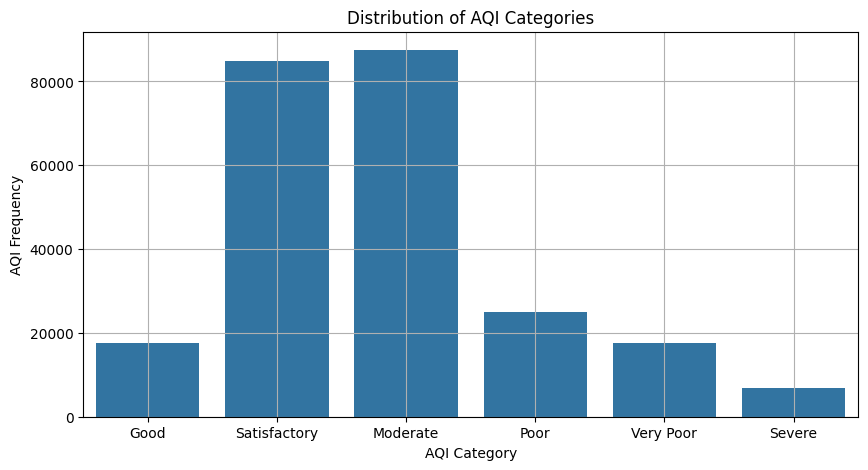

In [35]:
# Frequencies of AQI in diff AQI categories
plt.figure(figsize=(10, 5))
sns.countplot(x='AQI_Bucket', data=AQI_df, order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
plt.title("Distribution of AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("AQI Frequency")
plt.grid(True)
plt.show()

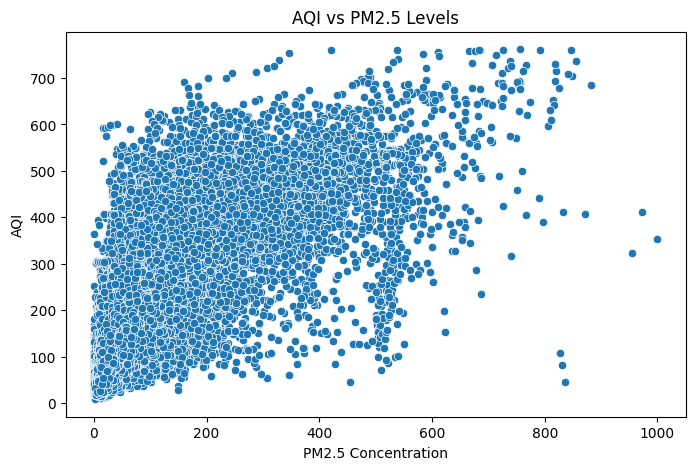

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PM2.5', y='AQI', data=AQI_df)
plt.title("AQI vs PM2.5 Levels")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("AQI")
plt.show()

1. AQI increases significantly as PM2.5 concentration rises up to ~200 µg/m³. Indicates that PM2.5 is a major contributor to AQI levels in this ranges.
2. After 200 µg/m³, AQI does not increase proportionally with PM2.5. This suggests a saturation effect, where other pollutants (like CO, NO₂) also play a role
3. A few points show extreme AQI values (>700), despite lower PM2.5 concentrations.

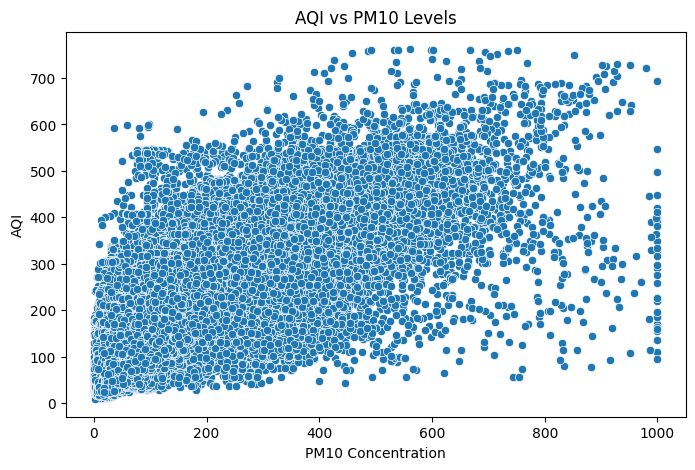

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PM10', y='AQI', data=AQI_df)
plt.title("AQI vs PM10 Levels")
plt.xlabel("PM10 Concentration")
plt.ylabel("AQI")
plt.show()

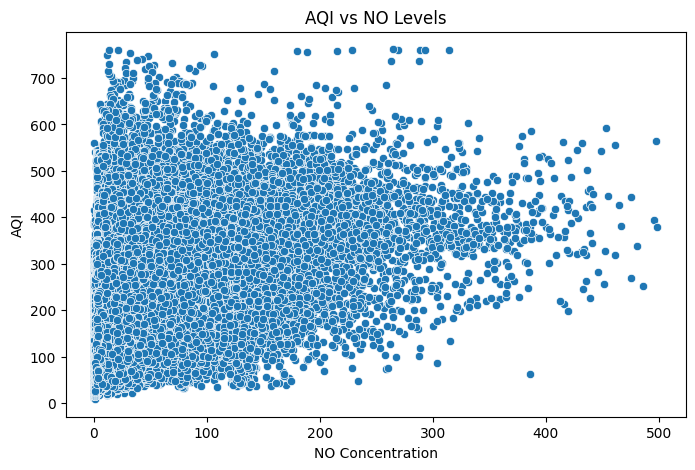

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='NO', y='AQI', data=AQI_df)
plt.title("AQI vs NO Levels")
plt.xlabel("NO Concentration")
plt.ylabel("AQI")
plt.show()

1. As NO concentration increases AQI also tends to decrease, but the pattern is not strictly linear. Suggests that NO contributes to air pollution moderately.

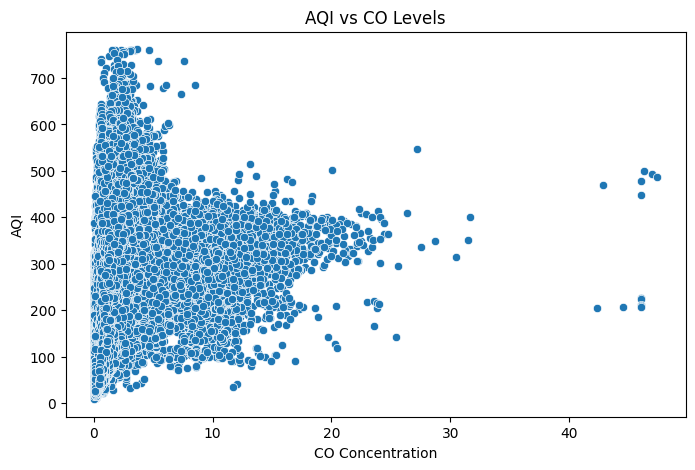

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='CO', y='AQI', data=AQI_df)
plt.title("AQI vs CO Levels")
plt.xlabel("CO Concentration")
plt.ylabel("AQI")
plt.show()

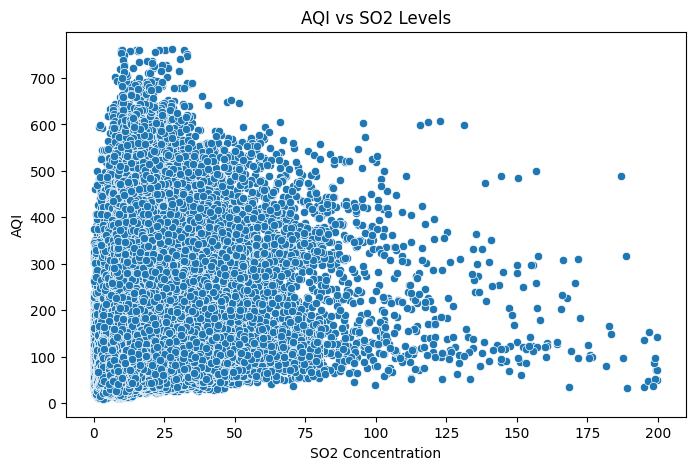

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='SO2', y='AQI', data=AQI_df)
plt.title("AQI vs SO2 Levels")
plt.xlabel("SO2 Concentration")
plt.ylabel("AQI")
plt.show()

1. The plot shows a widely spread distribution with no strong upward trend. Indicates that SO₂ does not have a significant direct impact on AQI.
2. This indicates that SO₂ levels are generally lower compared to other pollutants in the dataset.


In [41]:
# Converting datetime column from object datatype to datetime64 datatype 
AQI_df['Datetime'] = pd.to_datetime(AQI_df['Datetime'], errors='coerce')

In [42]:
# Printing datatype of all the columns
print(AQI_df.dtypes)

City                  object
Datetime      datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
AQI                  float64
AQI_Bucket            object
dtype: object


In [43]:
# Determinnig the cities present in the dataset
Cities = AQI_df['City'].unique()
print("Unique Cities:- ", Cities)

Unique Cities:-  ['Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Chandigarh' 'Chennai'
 'Coimbatore' 'Delhi' 'Gurugram' 'Hyderabad' 'Jaipur' 'Kolkata' 'Patna'
 'Shillong' 'Talcher' 'Visakhapatnam']


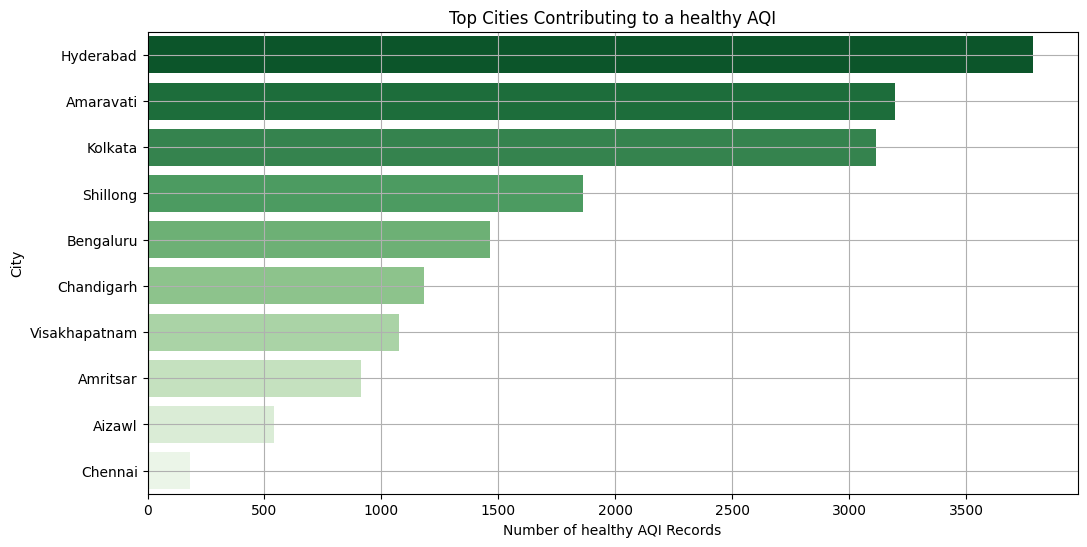

In [44]:
# Plot to show cities have a healthy AQI 
managable_aqi_cities = AQI_df[AQI_df['AQI_Bucket'] == 'Good']
city_counts = managable_aqi_cities['City'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette="Greens_r")
plt.title("Top Cities Contributing to a healthy AQI")
plt.xlabel("Number of healthy AQI Records")
plt.ylabel("City")
plt.grid(True)
plt.show()

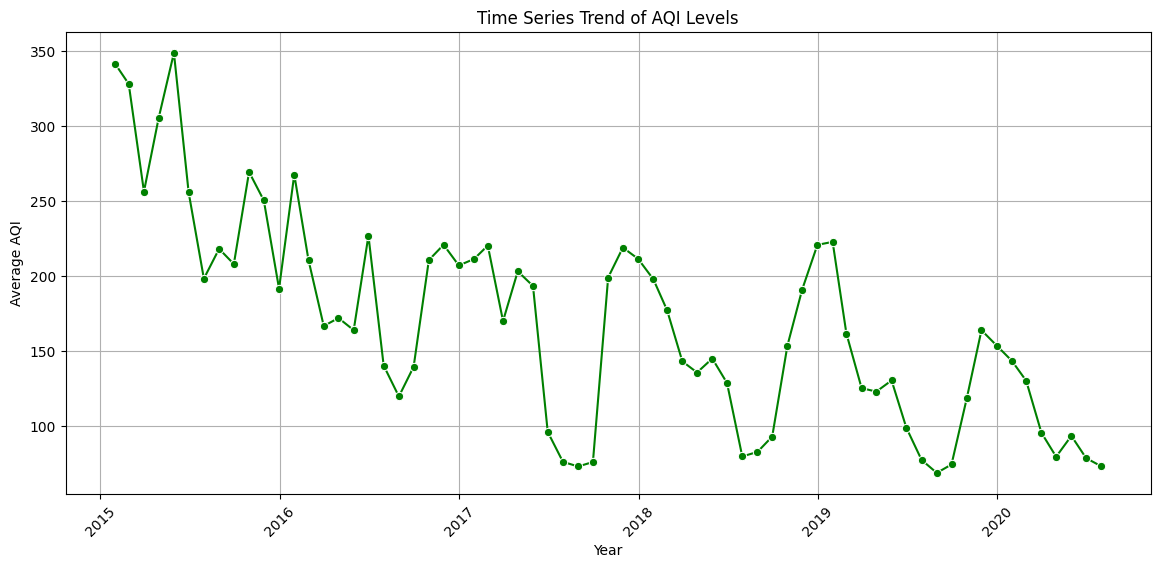

In [45]:
AQI_df.set_index('Datetime', inplace=True)
monthly_aqi_trend = AQI_df['AQI'].resample('M').mean()
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_aqi_trend.index, y=monthly_aqi_trend.values, marker="o", color='green')
plt.title("Time Series Trend of AQI Levels")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

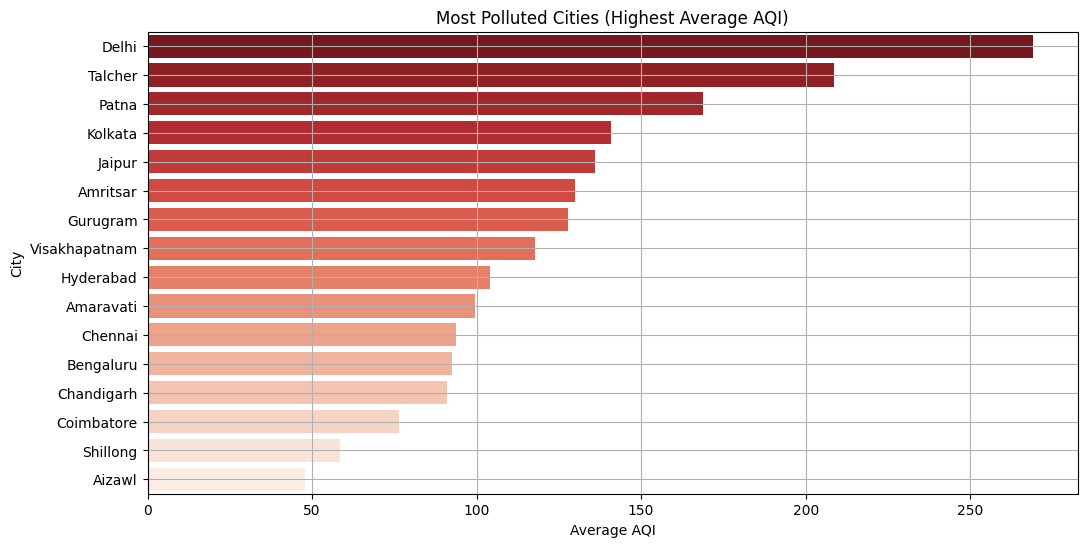

In [46]:
city_aqi = AQI_df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(26)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_aqi.values, y=city_aqi.index, palette="Reds_r")
plt.title("Most Polluted Cities (Highest Average AQI)")
plt.xlabel("Average AQI")
plt.ylabel("City")
plt.grid(True)
plt.show()

In [47]:
AQI_df.head(15)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
Datetime,,,,,,,,,,,,,,
2020-03-12 13:00:00,Aizawl,25.0,31.11,7.14,1.86,11.28,24.00,0.42,4.31,0.76,1.5,4.33,51.0,Satisfactory
2020-03-12 14:00:00,Aizawl,19.0,29.17,7.32,1.15,10.85,27.59,0.44,4.65,0.07,1.5,4.33,52.0,Satisfactory
2020-03-12 15:00:00,Aizawl,24.0,30.00,7.14,1.04,10.51,31.13,0.43,4.83,0.67,1.5,4.33,52.0,Satisfactory
2020-03-12 16:00:00,Aizawl,25.0,32.08,7.20,1.19,10.74,33.31,0.46,5.26,0.05,1.5,4.33,53.0,Satisfactory
2020-03-12 17:00:00,Aizawl,33.0,41.00,7.22,1.37,10.93,30.05,0.50,5.39,0.02,1.5,4.33,54.0,Satisfactory
2020-03-13 04:00:00,Aizawl,39.0,42.78,7.06,0.04,9.07,20.85,0.51,3.73,0.02,1.5,4.33,56.0,Satisfactory
2020-03-13 05:00:00,Aizawl,41.0,42.00,7.02,0.02,8.96,19.35,0.51,3.39,0.02,1.5,4.33,57.0,Satisfactory
2020-03-13 12:00:00,Aizawl,26.0,34.00,7.25,1.37,10.96,31.94,0.53,4.52,0.47,1.5,4.33,61.0,Satisfactory
2020-03-13 13:00:00,Aizawl,32.0,46.00,7.07,1.30,10.64,33.39,0.51,5.02,0.45,1.5,4.33,61.0,Satisfactory


In [48]:
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239322 entries, 2020-03-12 13:00:00 to NaT
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        239322 non-null  object 
 1   PM2.5       239322 non-null  float64
 2   PM10        239322 non-null  float64
 3   NO          239322 non-null  float64
 4   NO2         239322 non-null  float64
 5   NOx         239322 non-null  float64
 6   NH3         239322 non-null  float64
 7   CO          239322 non-null  float64
 8   SO2         239322 non-null  float64
 9   O3          239322 non-null  float64
 10  Benzene     239322 non-null  float64
 11  Toluene     239322 non-null  float64
 12  AQI         239322 non-null  float64
 13  AQI_Bucket  239322 non-null  object 
dtypes: float64(12), object(2)
memory usage: 27.4+ MB


In [49]:
AQI_df.shape

(239322, 14)

In [50]:
#Saving the updated dataset into final.csv
AQI_df.to_csv('final.csv',index=True)